#CENG391 - Homework#2
##GitHub: halilcanuyanik

#1) Importing related libraries and uploading the image

In [ ]:
import cv2 #---> Used to read the image and perform filter on the image
import numpy as np #---> Used to create kernels for filtering
from scipy import ndimage #---> Used to apply roberts filter
import matplotlib.pyplot as plt #---> Used to view the images
from scipy.signal import medfilt2d #---> Used to apply median filter
from skimage.util import random_noise #---> Used to make salt and pepper noise on the image

!wget https://pbs.twimg.com/media/DqjLW01X4AAaec7.jpg #---> Getting the image

--2022-10-31 18:40:16--  https://pbs.twimg.com/media/DqjLW01X4AAaec7.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 146.75.92.159, 2a04:4e42:87::159
Connecting to pbs.twimg.com (pbs.twimg.com)|146.75.92.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134056 (131K) [image/jpeg]
Saving to: ‘DqjLW01X4AAaec7.jpg.16’

DqjLW01X4AAaec7.jpg 100%[===================>] 130.91K  --.-KB/s    in 0.02s   

2022-10-31 18:40:16 (5.22 MB/s) - ‘DqjLW01X4AAaec7.jpg.16’ saved [134056/134056]



#2)Reading the image and converting the image to grayscale

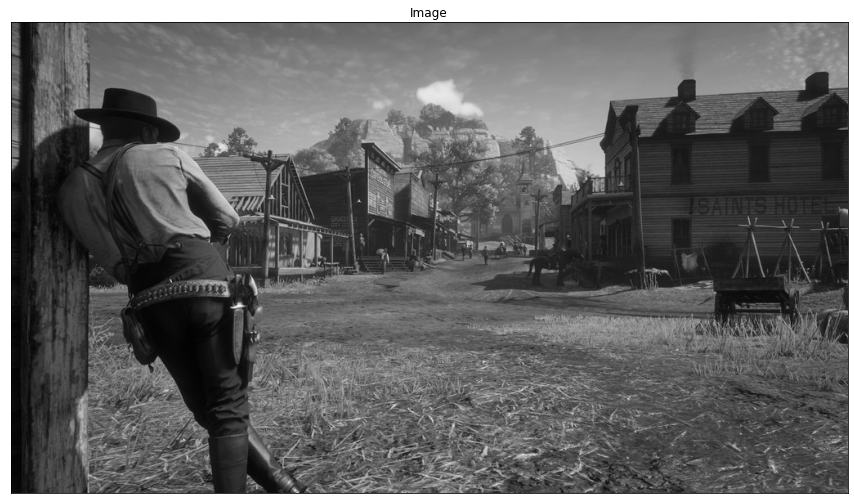

In [ ]:
image = cv2.imread("DqjLW01X4AAaec7.jpg") #--> Reading the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #--> Convertion to grayscale

#Displaying the image to check
plt.figure(figsize=(15,15))
plt.imshow(gray ,cmap = "gray")
plt.title('Image')
plt.xticks([])
plt.yticks([])

plt.show()

#3)Adding Salt & Pepper Noise

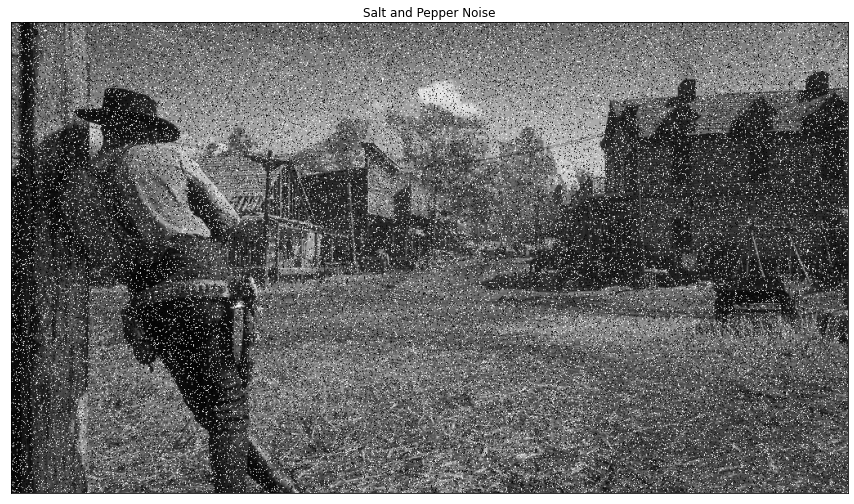

In [ ]:
salt_and_pepper_image = random_noise(gray, mode='s&p',amount=0.15) #---> Creating salt and pepper noise on the image with probability of 0.15.

#Displaying the image
plt.figure(figsize=(15,15))
plt.imshow(salt_and_pepper_image ,cmap = "gray")
plt.title('Salt and Pepper Noise')
plt.xticks([])
plt.yticks([])

plt.show()

#4)Applying Averaging Filter and Median Filter

##Applying Averaging Filter with various sizes

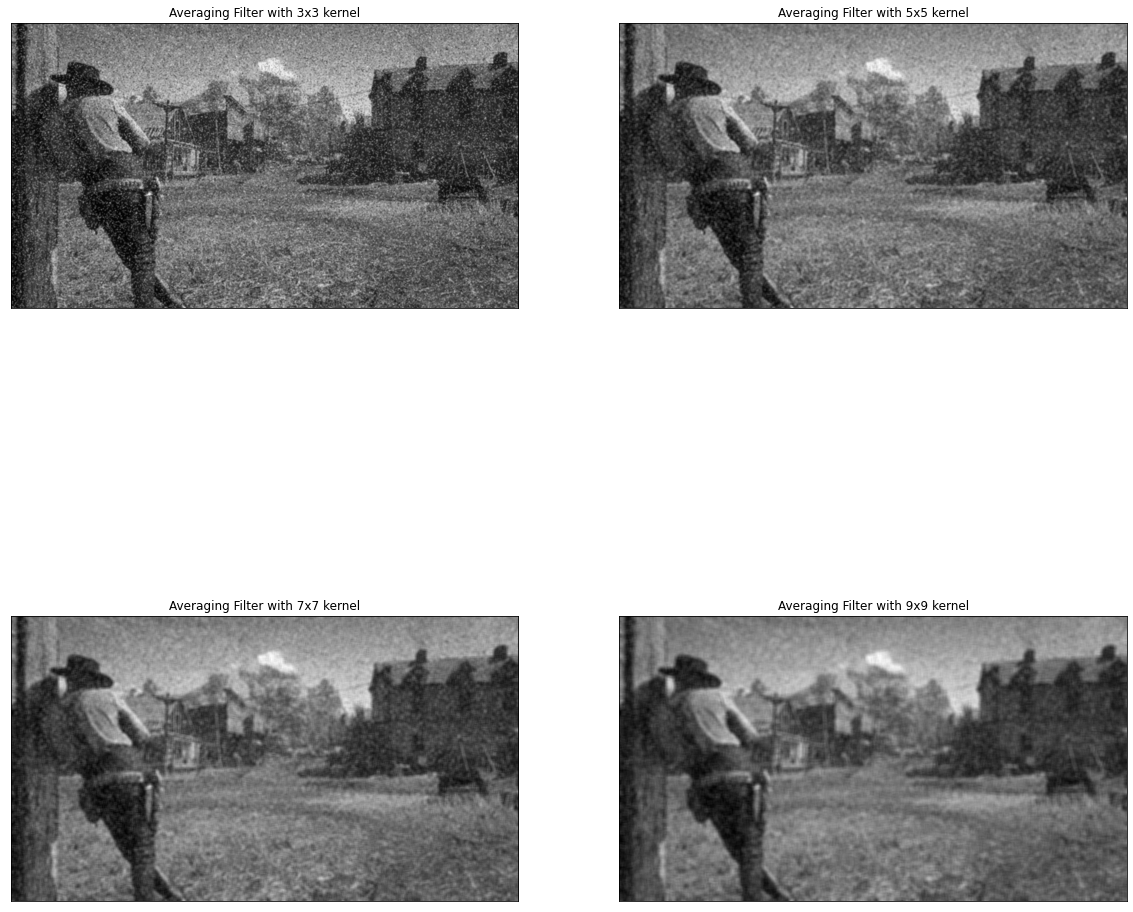

In [ ]:
#Applying Averaging Filter with various size of kernels
blur3 = cv2.blur(salt_and_pepper_image,(3,3))
blur5 = cv2.blur(salt_and_pepper_image,(5,5))
blur7 = cv2.blur(salt_and_pepper_image,(7,7))
blur9 = cv2.blur(salt_and_pepper_image,(9,9))

#Plotting the images after applying Averaging Filter
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(blur3 ,cmap = "gray")
plt.title('Averaging Filter with 3x3 kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(blur5, cmap = "gray")
plt.title('Averaging Filter with 5x5 kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(blur7 ,cmap = "gray")
plt.title('Averaging Filter with 7x7 kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(blur9, cmap = "gray")
plt.title('Averaging Filter with 9x9 kernel')
plt.xticks([])
plt.yticks([])

plt.show()

**As it seems as kernel matrice's size increases, the blur effect gets obvious with the Averaging Filter. However, it does not provide the proper approach to get rid of salt and pepper noises on the image.**

##Applying Median Filter with various sizes

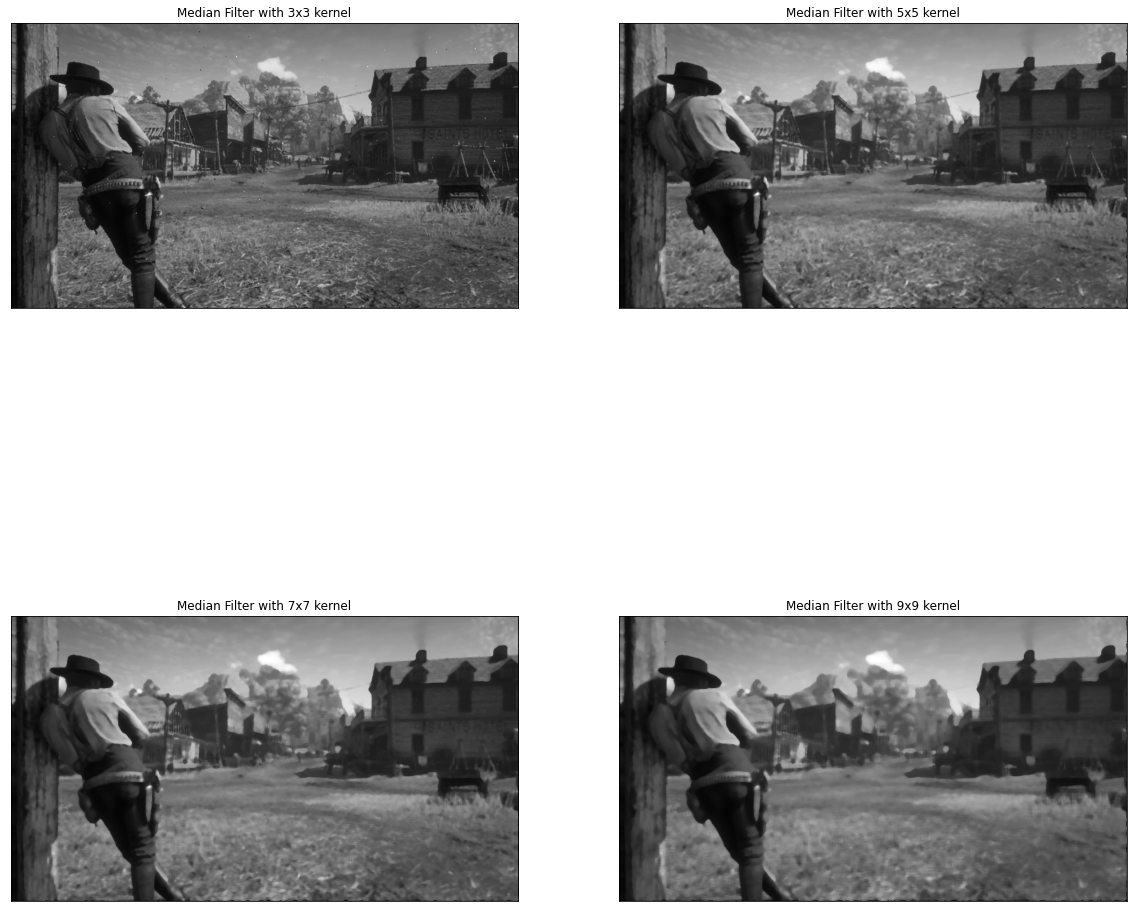

In [ ]:
#Applying Median Filter with various size of kernels
median3 = medfilt2d(salt_and_pepper_image, kernel_size=3)
median5 = medfilt2d(salt_and_pepper_image, kernel_size=5)
median7 = medfilt2d(salt_and_pepper_image, kernel_size=7)
median9 = medfilt2d(salt_and_pepper_image, kernel_size=9)

#Plotting the images after applying Median Filter
plt.figure(figsize=(20,20))

plt.subplot(221)
plt.imshow(median3 ,cmap = "gray")
plt.title('Median Filter with 3x3 kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(222)
plt.imshow(median5, cmap = "gray")
plt.title('Median Filter with 5x5 kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(223)
plt.imshow(median7 ,cmap = "gray")
plt.title('Median Filter with 7x7 kernel')
plt.xticks([])
plt.yticks([])

plt.subplot(224)
plt.imshow(median9, cmap = "gray")
plt.title('Median Filter with 9x9 kernel')
plt.xticks([])
plt.yticks([])

plt.show()

**Unlike Averaging Filter, Median Filter helps to get rid of the salt and pepper noise on the image. However, as kernel size increases details get lost on the image and the image loses its sharpness.**

#5)Robert's Filter and Edge Detection

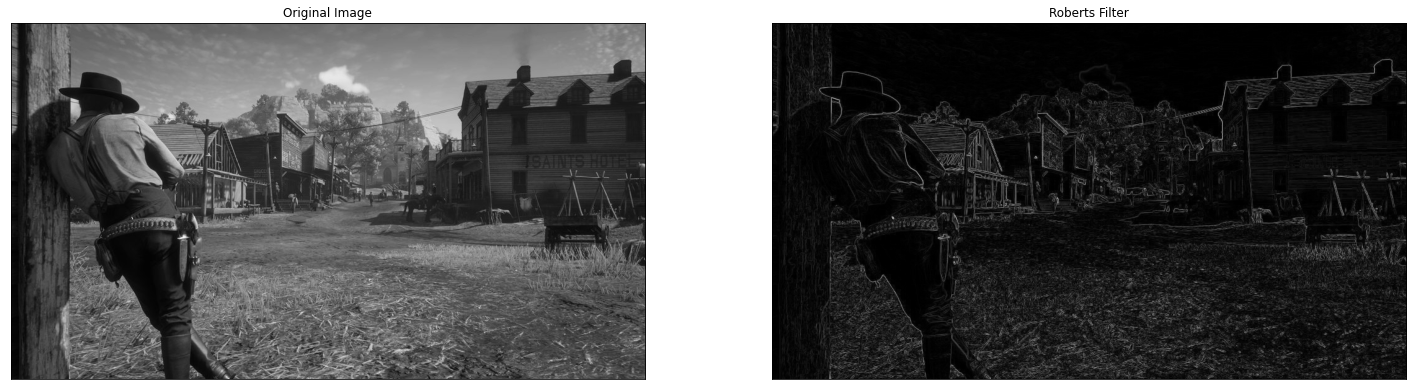

In [ ]:
#Initializing the pair of Roberts cross operators (kernels)
roberts_cross_horizontal = np.array([[ -1, 0 ],
                                     [ 0, 1 ]])

roberts_cross_vertical = np.array([[ 0, -1 ],
                                   [ 1,0 ]])

#Since following operators only support float64 dtype and current image is in uint8 format, a copy created whose its dtype is float64. Nothing else changed.
copied_gray = np.asarray(gray, dtype='float64')

#Calculating Gx and Gy
vertical = ndimage.convolve(copied_gray, roberts_cross_vertical)
horizontal = ndimage.convolve(copied_gray, roberts_cross_horizontal)

#Calculating G (Gradient Magnitude).
edged_image = np.sqrt(np.square(horizontal) + np.square(vertical))

#Plotting the images
plt.figure(figsize=(25,25))

plt.subplot(121)
plt.imshow(copied_gray ,cmap = "gray")
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.imshow(edged_image, cmap = "gray")
plt.title('Roberts Filter')
plt.xticks([])
plt.yticks([])

plt.show()

#6) Canny Edge Detection

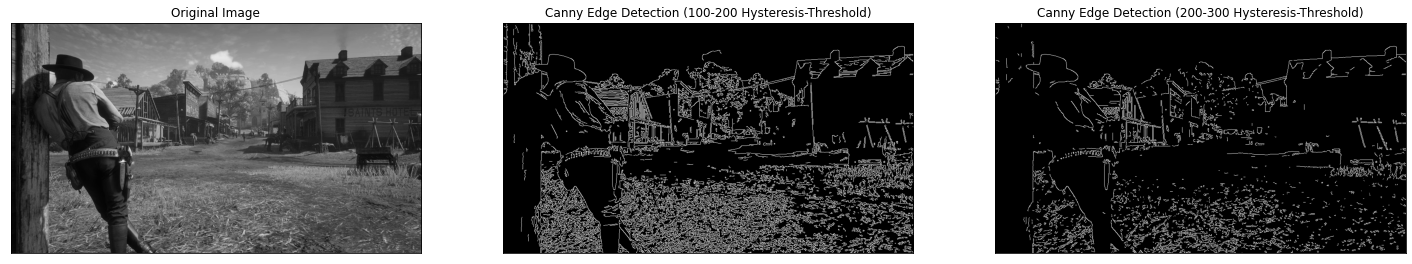

In [ ]:
canny_edge1 = cv2.Canny(gray,100,200)

canny_edge2 = cv2.Canny(gray,200,300)

plt.figure(figsize=(25,25))

plt.subplot(131)
plt.imshow(gray,cmap = "gray")
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

plt.subplot(132)
plt.imshow(canny_edge1,cmap = "gray")
plt.title('Canny Edge Detection (100-200 Hysteresis-Threshold)')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(canny_edge2,cmap = "gray")
plt.title('Canny Edge Detection (200-300 Hysteresis-Threshold)')
plt.xticks([])
plt.yticks([])

plt.show()

**It can be seen that not all edge details are detected compared to the previous canny edge detection which has lower threshold and hysteresis values. This is of course because the threshold that should have been low for edge detection has been increased.**